<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grado en Ciéncia de Datos Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia i Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Alumno: Alberto Rodríguez Álvarez

# **PEC 4. Redes Neuronales**

## Introducción

En esta PEC estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de problemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes sepan aplicar sus conocimientos a su trabajo diario o vocación de una forma profesional, y poseer las competencias adquiridas por medio de la elaboración y defensa de argumentos y la resolución de problemas dentro de su área de estudio.
- Diseñar y construir aplicaciones analíticas mediante técnicas de desarrollo, integración y reutilización de componentes software.
- Buscar, gestionar y utilizar la información más adecuada para modelizar problemas concretos y aplicar adecuadamente procedimientos teóricos para su resolución de forma autónoma y creativa.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Conocer las distintas partes que forman una red neuronal, así como las técnicas de entrenamiento de las mismas.
- Realizar un análisis de los resultados obtenidos con diversas arquitecturas de redes neuronales en problemas de clasificación, utilizando las métricas de evaluación comunes para estos problemas.
- Familiarización con librerías de programación de redes neuronales a través de ejemplos.
- Detectar qué tipo de red es la más indicada para un problema concreto. Una vez detectada, implementar la arquitectura usando librerías de aprendizaje profundo.

## Descripción de la PEC

Para ello, en este notebook deberán realizar 3 ejercicios:

1. Crear una red neuronal convolucional (CNN) simple para clasificar imágenes. Conseguir una precisión lo más alta posible.

2. Entrenar una red neuronal con la estrategia de transfer learning por un caso binario.

3. Entrenar una red neuronal de regresión.

# Ejercicio 1: Clasificación de imágenes

En el campo de la visión por computador existen diferentes tareas que podemos realizar para analizar una imagen. En este ejercicio trabajaremos con la más común: la clasificación de imágenes. Por ejemplo: clasificar las imágenes en función de qué animal aparece: gato, perro, pato, etc.

Una red neuronal para la clasificación de imágenes tiene como entrada una imagen y como salida **un valor por cada clase que queremos predecir**.

## Código de referencia

Para resolver este ejercicio dispone de los notebooks de la asignatura que aparecen en este capítulo:
https://gitlab.uoclabs.uoc.es/aprendizaje_automatic/aprendizaje_automatic/-/tree/master/5_neural_networks_examples

Además, en este ejercicio le daremos algunas funciones ya implementadas para introducir el problema que queremos resolver y que deberá utilizarlas/modificarlas para realizar los ejercicios.

Primero de todo debemos asegurarnos que tenemos instaladas las librerías de Python necesarias:

In [8]:
! pip install -q matplotlib tensorflow numpy scikit-image

Importamos los módulos de Python que necesitaremos:

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from skimage.transform import resize
import matplotlib.pyplot as plt

**IMPORTANTE:** Cuando trabajamos con la librería de deep learning `keras` debemos asegurarnos de que estamos utilizando una instancia de Colab de tipo "GPU". Si no, el entrenamiento de nuestras redes será hasta 10 veces más lento.

Para cambiar el tipo de instancia de Colab vaya al menú superior "Runtime" -> "Change Runtime Type" -> "GPU".

In [12]:
print('Check GPU runtime type... ')
if len(tf.config.list_physical_devices('GPU')) == 0:
  print('Change Runtype Type in top menu for GPU acceleration')
else:
  print('OK!')

Check GPU runtime type... 
Change Runtype Type in top menu for GPU acceleration


## EJERCICIO 1: Crear una red neuronal convolucional (CNN) simple para clasificar imágenes

En este ejercicio deberá crear una red neuronal convolucional (CNN) para clasificar imágenes.

Puede utilizar un modelo CNN sencillo similar al ejemplo del notebook [01_CNN_MNIST.ipynb](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/5_neural_networks_examples/01_CNN_MNIST.ipynb) de clasificación imágenes que tiene en el repositorio de la asignatura.

Fíjese que la entrada debe definir el mismo tamaño que las imágenes del dataset y que la capa de salida debe tener tantas neuronas como clases tenga el dataset.

### 1.1 Cargar los datos [0.5 puntos]

En este ejercicio utilizaremos el dataset [cifar10](https://www.tensorflow.org/datasets/catalog/cifar10). Utilizando como referencia el código del notebook [01_CNN_MNIST.ipynb](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/5_neural_networks_examples/01_CNN_MNIST.ipynb) carga el dataset y comprueba qué formato tiene. Muestra una imagen para comprobar que todo ha funcionado bien.

In [477]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()

In [479]:
print("hay datos faltantes?",np.isnan(x_train_orig).any(),np.isnan(x_test_orig).any(),
      np.isnan(y_train_orig).any(),np.isnan(y_test_orig).any())

hay datos faltantes? False False False False


In [481]:
x_train_orig[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

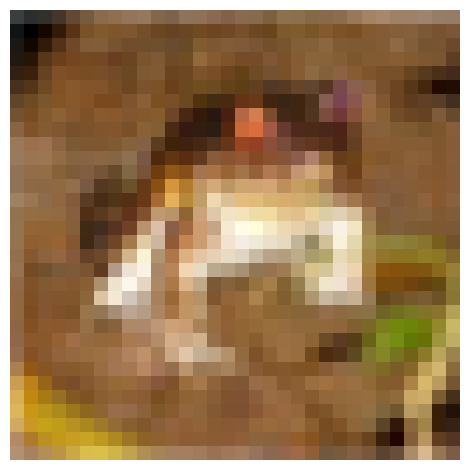

In [483]:
# Visualize the first image of the training set
# dado que es
from PIL import Image

first_image = x_train_orig[0]
first_image = Image.fromarray(first_image)
pixels = first_image.resize((32, 32))
pixels = np.array(pixels)

plt.imshow(pixels, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [485]:
# check the image size
x_train_orig[0].shape

(32, 32, 3)

In [487]:
# check the size of the original data
print("Shape of the original train data: {}".format(x_train_orig.shape))
print("Shape of the original test data: {}".format(x_test_orig.shape))

Shape of the original train data: (50000, 32, 32, 3)
Shape of the original test data: (10000, 32, 32, 3)


En el conjunto de imágenes CIFAR10 hay 50000 de ella para entrenamiento y 10000 para test. Sus tamaños son de 32x32 y son imágenes con color

### 1.2 Prepara los datos [0.5 puntos]
  - Normaliza los datos entre 0 y 1 para poder utilizarlos para entrenar los modelos
  - Convierte las variables y en one_hot encoding

In [491]:

# Find the min and max values in the training set
v_min = np.min(x_train_orig)
v_max = np.max(x_train_orig)
print("Min. and max. values before normalization are {} and {}.".format(v_min, v_max))

# Normalization
x_train_orig = (x_train_orig - v_min) / (v_max - v_min)
x_test_orig = (x_test_orig - v_min) / (v_max - v_min)

print("Min. and max. values after normalization are {} and {}.".format(np.min(x_train_orig), np.max(x_train_orig)))

Min. and max. values before normalization are 0 and 255.
Min. and max. values after normalization are 0.0 and 1.0.


In [493]:
# No es necesario realizar ningún cambio en las dimensiones del df.
x_train = x_train_orig
x_test = x_test_orig

In [495]:
# transformar a one_hot
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

print("Shape of y_train_orig is {} and the value of y_train_orig[0] is {}".format(y_train_orig.shape, y_train_orig[0]))
print("Shape of y_train is {} and the value of y_train[0] is {}".format(y_train.shape, y_train[0]))

Shape of y_train_orig is (50000, 1) and the value of y_train_orig[0] is [6]
Shape of y_train is (50000, 10) and the value of y_train[0] is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 1.3 Crear, compilar y entrenar el modelo [0.5 puntos]

  - Crea un modelo de deep learning. Puedes utilizar como referencia el modelo del notebook. Comprueba que el número de clases de salida sea el mismo y adapta el input_shape para que corresponda a las imágenes del dataset cifar.
  - Añada el código necesario para compilar el modelo. Fíjese que debe indicar la función de coste (`loss`) adecuada para un problema de clasificación. En [este enlace](https://keras.io/api/losses/) puede consultar la documentación de las funciones de coste de `Keras`.
  - Una vez compilado, añada el código necesario a la siguiente celda para entrenar su modelo durante 35 épocas.

In [498]:
np.random.seed(42)
num_classes = 10

model = Sequential()

# Add each layer to the model
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(32,32,3)))
# shape: x_train.shape[1:]
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))

C:\Users\alber\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [500]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [502]:
n_epochs = 50
mfit = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=n_epochs)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3871 - loss: 1.7595 - val_accuracy: 0.5495 - val_loss: 1.2807
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5840 - loss: 1.2089 - val_accuracy: 0.5777 - val_loss: 1.2114
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6300 - loss: 1.0766 - val_accuracy: 0.5912 - val_loss: 1.1805
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6630 - loss: 0.9843 - val_accuracy: 0.6044 - val_loss: 1.1342
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6971 - loss: 0.8965 - val_accuracy: 0.6165 - val_loss: 1.1084
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7237 - loss: 0.8163 - val_accuracy: 0.6278 - val_loss: 1.0830
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7514 - loss: 0.7432 - val_accuracy: 0.6220 - val_loss: 1.1120
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7741 - loss: 0.6762 - val_accu

### 1.4 Visualizar las curvas de la función de coste durante el proceso de entrenamiento [0.5 puntos]

Revise los notebooks para generar el código para la visualización de las curvas de la función de coste a los conjuntos de datos de entrenamiento y validación durante el entrenamiento del modelo.

In [503]:
# plot accuracy and loss
def plot_prediction(n_epochs, mfit):
    N = n_epochs
    plt.style.use("ggplot")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    fig.suptitle('Training Loss and Accuracy')

    ax1.plot(np.arange(0, N), mfit.history["accuracy"], label="train")
    ax1.plot(np.arange(0, N), mfit.history["val_accuracy"], label="val")
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Epoch #")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc="lower right")

    ax2.plot(np.arange(0, N), mfit.history["loss"], label="train")
    ax2.plot(np.arange(0, N), mfit.history["val_loss"], label="val")
    ax2.set_title("Loss")
    ax2.set_xlabel("Epoch #")
    ax2.set_ylabel("Loss")
    ax2.legend(loc="upper right")

    plt.show()

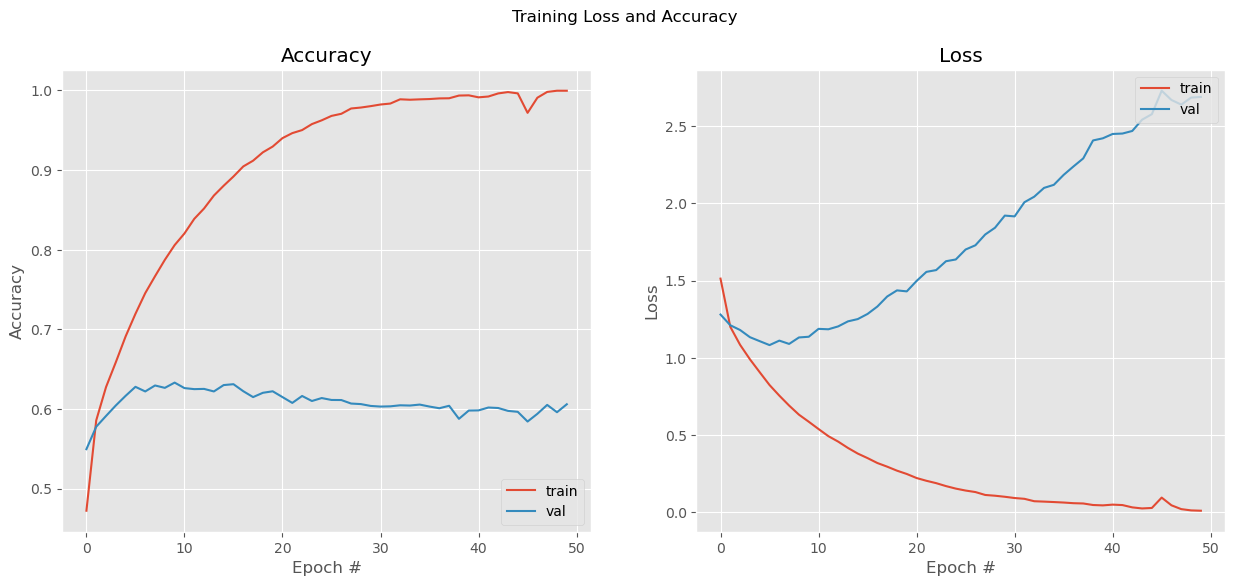

In [504]:
 plot_prediction(n_epochs, mfit)

### 1.5 Análisis de los resultados [0.5 puntos]

Comenta los resultados obtenidos hasta el momento. ¿Consideras que el modelo se está entrenando correctamente? ¿Habría que mejorarlo?

Gracias a la primera gráfica, podemos observar que la precisión en el conjunto de entrenamiento (línea roja) aumenta constantemente y alcanza casi el 100%, lo que indica que el modelo está aprendiendo bien los datos de entrenamiento. Sin embargo, la precisión en el conjunto de validación (línea azul) se estabiliza alrededor del 60% y no mejora significativamente después de unas pocas épocas, lo que puede ser un indicio de sobreajuste (overfitting).
En la segunda gráfica lo que podemos ver es la pérdida en el conjunto de entrenamiento (línea roja) disminuye constantemente, lo que indica que el modelo está mejorando su ajuste a los datos de entrenamiento. Por el contrario, sobreajustando los datos de entrenamiento y no generaliza bien a los datos de validación.
El modelo tiene un buen rendimiento en los datos de entrenamiento, pero no se generaliza bien a los datos de validación debido a un posible sobreajuste.
Sería aconsejable ajustar los parámetros y mejorarlo como se indica en el punto siguiente para evitar el *overfitting*

### 1.6 Entrenamiento con modelo más complejo [1 punto]

Prueba varios modelos hasta obtener uno que mejore el 75% de accuracy en validación. Visualiza las curvas de resultados obtenidos y compáralos con los resultados del ejercicio 1.6.

Para obtener mejores resultados, puedes utilizar capas de **Dropout** entre las capas convolucionales y densas.

In [65]:
np.random.seed(42)
num_classes = 10

model2 = Sequential()

# Add each layer to the model 2.0
# 1º convo. 32 filtros + MaxPooling(-dim) + Dropout (-sobreajuste)
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
# 2º convo. 64 + idem
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
# 3º convo. 128 + idem
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
# aplanamiento 2D -> 1D
model2.add(Flatten())
# 512 neuronas
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

C:\Users\alber\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
n_epochs = 50
mfit2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=n_epochs)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.2451 - loss: 1.9930 - val_accuracy: 0.4795 - val_loss: 1.4428
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4757 - loss: 1.4444 - val_accuracy: 0.5651 - val_loss: 1.2247
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5440 - loss: 1.2733 - val_accuracy: 0.6004 - val_loss: 1.1410
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5788 - loss: 1.1779 - val_accuracy: 0.6313 - val_loss: 1.0479
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6073 - loss: 1.1093 - val_accuracy: 0.6408 - val_loss: 1.0202
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6283 - loss: 1.0554 - val_accuracy: 0.6742 - val_loss: 0.9238
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6422 - loss: 1.0051 - val_accuracy: 0.6811 - val_loss: 0.8947
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6609 - loss: 0.9670 - val_accu

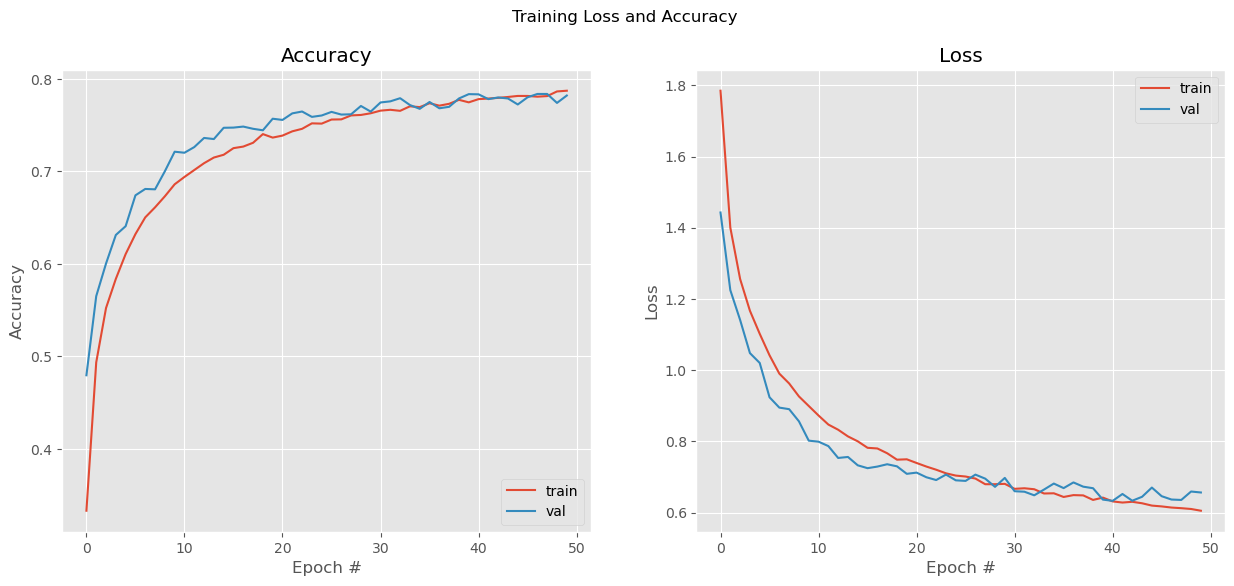

In [68]:
 plot_prediction(n_epochs, mfit2)

% pon aquí las conclusiones de los resultados obtenidos

Se ha mejorado el modelo original añadiendo más capas convolucionales, capas de MaxPooling y Dropout para reducir el sobreajuste. Esto ha generado un  aumento significativo en la precisión de validación, alcanzando un val_accuracy de 0.7822. Esto es un avance notable comparado con el modelo anterior.

Las gráficas muestran una precisión de entrenamiento y validación que se mantienen cercanas, lo que sugiere una buena generalización del modelo sin señales evidentes de sobreajuste (lo cual se buscaba solucionar). La pérdida de entrenamiento disminuye de manera constante, mientras que la pérdida de validación también disminuye, aunque con más fluctuaciones, lo que es común en conjuntos de validación.

En resumen, el nuevo modelo ha logrado superar el objetivo del 75% de precisión en la validación, demostrando que las capas adicionales y las técnicas de regularización han sido efectivas para mejorar el rendimiento y la generalización del modelo.

## Ejercicio 2: Entrenar una red neuronal con la estrategia de transfer learning por un caso binario

En este caso utilizaremos el notebook de [transfer learning](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/5_neural_networks_examples/02_CNN_Transfer_Learning.ipynb) como referencia para entrenar una red neuronal.


En primer lugar cargaremos el dataset "horses or humans" de tensorflow:

https://www.tensorflow.org/datasets/catalog/horses_or_humans


Utilizaremos el 80% de los datos de entrenamiento originales para el entrenamiento y el 20% para la validación.

In [80]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()


train_ds, validation_ds = tfds.load(
    "horses_or_humans",
     # 80% para entrenamiento, 20% para validación
    split=["train[:80%]", "train[80%:100%]"],
    as_supervised=True  # Incluye etiquetas
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds))

Dataset horses_or_humans downloaded and prepared to C:\Users\alber\tensorflow_datasets\horses_or_humans\3.0.0. Subsequent calls will reuse this data.
Number of training samples: 822
Number of validation samples: 205


Ejecuta la siguiente celda para visualizar las imágenes del dataset:

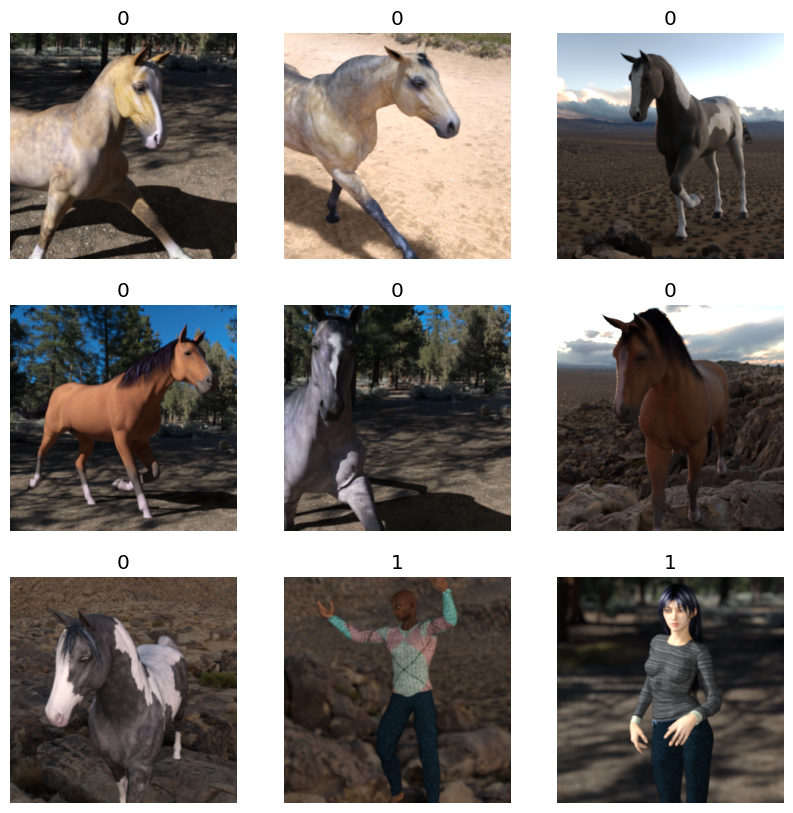

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

A continuación haremos un resize de las imágenes para trabajar con imágenes de tamaño 100x100:

In [85]:
size = (100, 100)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))

También habrá que preparar los batches y el dataset para realizar el entrenamiento:

In [88]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

### 2.1 Prepara el código para hacer data augmentation [0.5 puntos]

Sigue la información de la siguiente página para hacerlo:

https://www.tensorflow.org/tutorials/images/data_augmentation

Aplica por lo menos:
  - Random Flip
  - RandomRotation

Prueba diferentes valores por el parámetro RandomRotation. Quédate con lo que te parezca adecuado después de ver las imágenes generadas.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

data_augmentation_1 = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
data_augmentation_2 = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
])
data_augmentation_3 = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])
data_augmentation_4 = tf.keras.Sequential([
  layers.RandomContrast(0.8)
])
data_augmentation_5 = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
  layers.RandomContrast(0.8),
])

In [93]:
# código para visualizar las imágenes:
import numpy as np

def mostrar_diff_valores (data_augmentation_layer, title):
  for images, labels in train_ds.take(1):
      plt.figure(figsize=(10, 10))
      first_image = images[0]
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          augmented_image = data_augmentation_layer(
              tf.expand_dims(first_image, 0), training=True
          )
          plt.imshow(augmented_image[0].numpy().astype("int32"))
          plt.title(f"{title}\nLabel: {int(labels[0])}")
          plt.axis("off")
  plt.show()

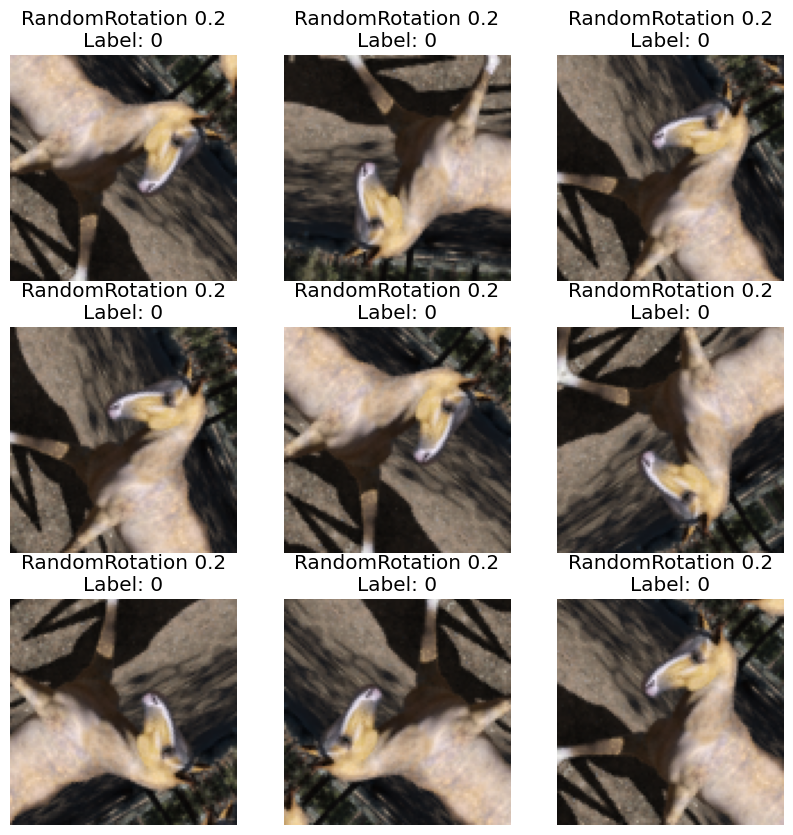

In [95]:
mostrar_diff_valores(data_augmentation_1, "RandomRotation 0.2")

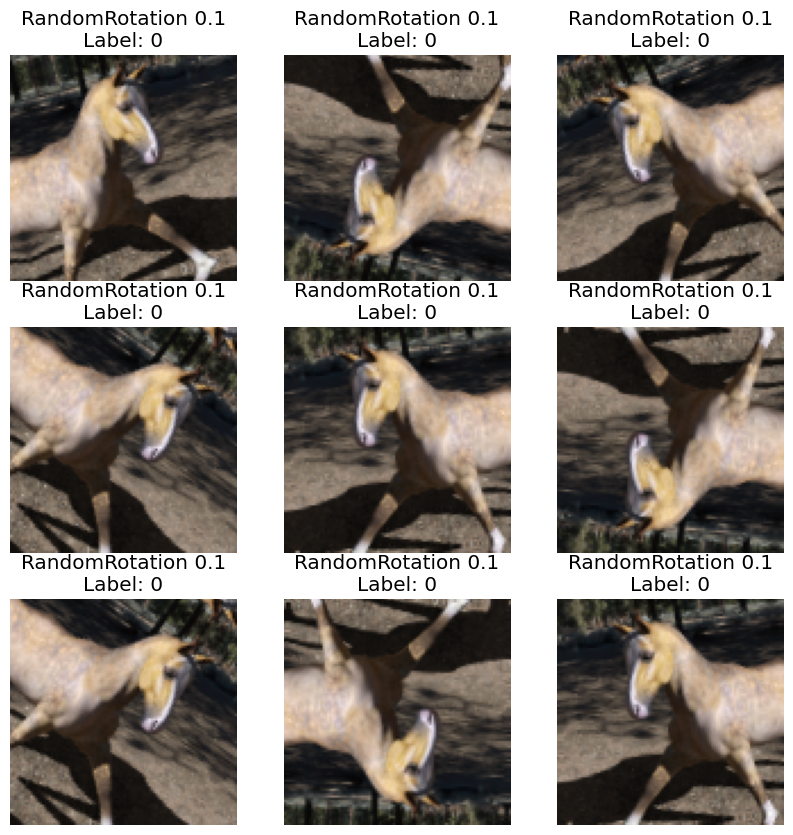

In [97]:
mostrar_diff_valores(data_augmentation_2, "RandomRotation 0.1")

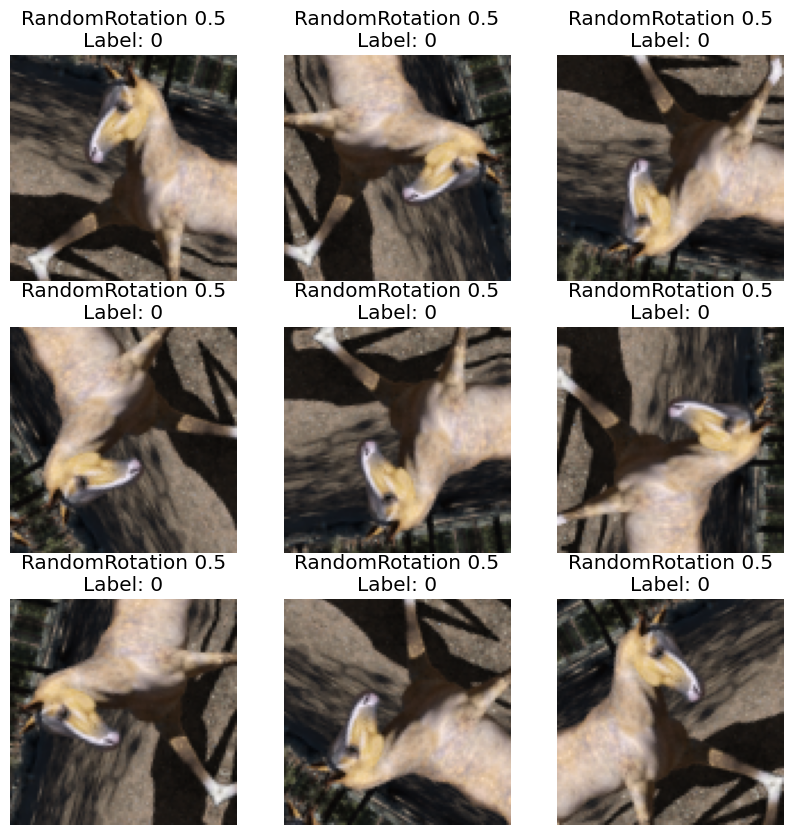

In [99]:
mostrar_diff_valores(data_augmentation_3, "RandomRotation 0.5")

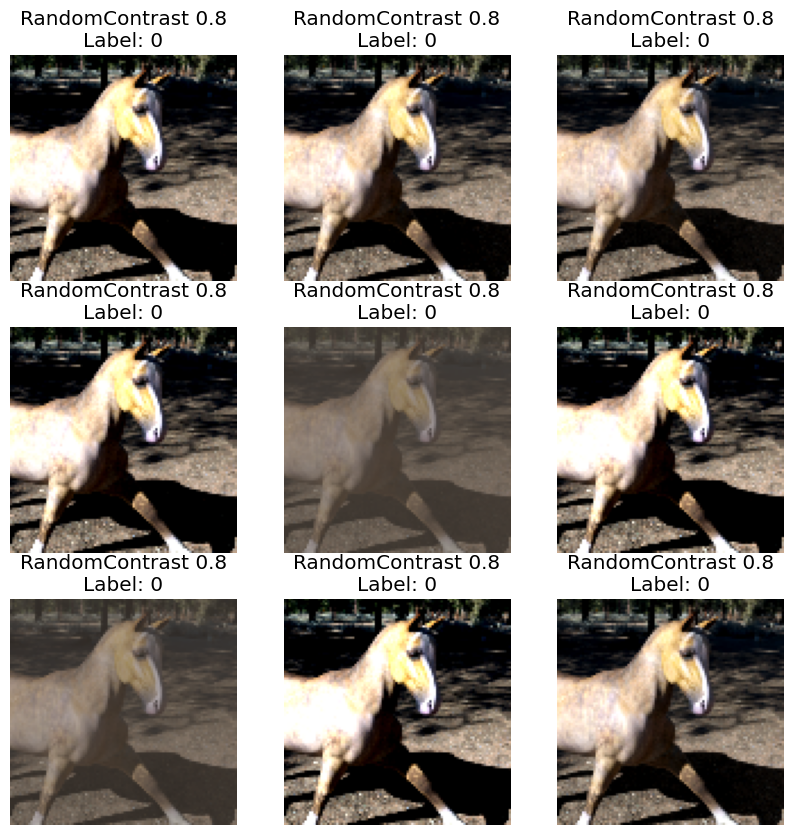

In [100]:
mostrar_diff_valores(data_augmentation_4, "RandomContrast 0.8")

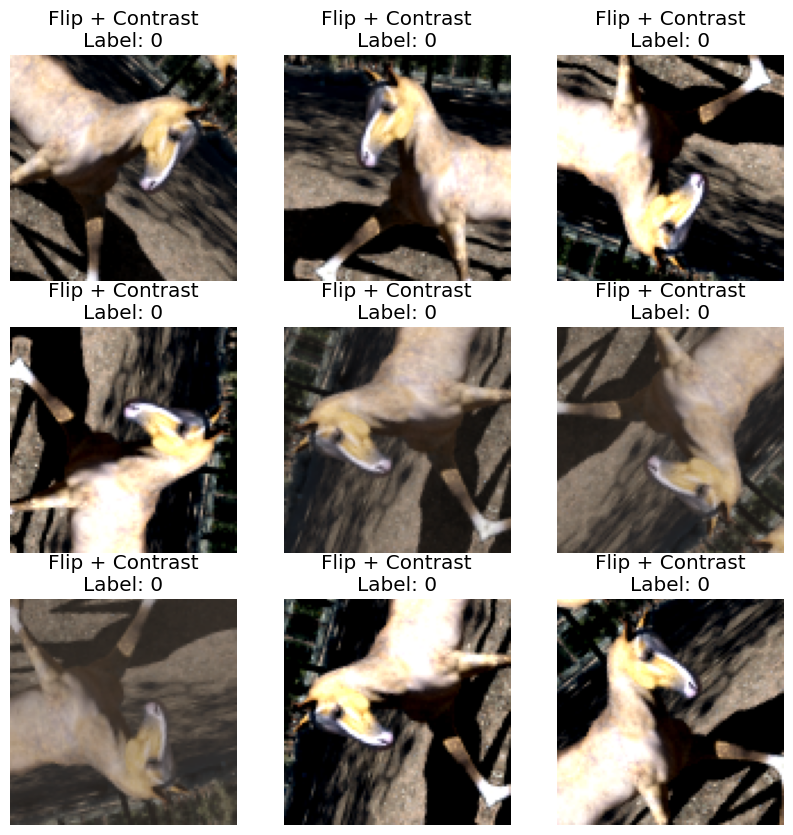

In [103]:
mostrar_diff_valores(data_augmentation_5, "Flip + Contrast")

Utilizar varios efectos/funciones genera mejores resultados. Por ello se aplicará tanto la rotación, giro como cambio de brillo/contraste.

### 2.2 Cargar la red (backbone) [0.5 punto]
En este paso, utilizaremos una red ResNet50 preentrenada a imagenet para congelar la base convolucional creada a partir del paso anterior para realizar el transfer learning a nuestro dataset.
Especifica los argumentos include_top=False y pooling='avg' para cargar una red que no incluye la capa de clasificación en la parte superior. Recuerda adaptar el tamaño de la red a las dimensiones de las imágenes.

In [475]:
# aunque es aconsejable utilizar imágenes de 224x224, en el enunciado se detalla este tamaño.
IMG_SIZE = (100, 100)
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.ResNet50(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
#base_model.summary()

### 2.3 Extracción de características y fine tuning [1 punto]

En este paso, debemos congelar el backbone creado en el apartado anterior para utilizarlo como extractor de funciones. A continuación, añade una capa de clasificación y entrena con nuestros datos de entrenamiento. Crea las celdas de código que creas necesarias para realizar la solución.

Por último comenta los resultados que has obtenido, analiza el números de épocas necesario y la accuracy obtenida.

In [109]:
# prevent the weights in a given layer from being updated during training (congelar)
base_model.trainable = False

In [111]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation_5(inputs)
x = tf.keras.applications.resnet.preprocess_input(x)

In [113]:
# Pasar las imágenes preprocesadas por la base convolucional
x = base_model(x, training=False)

# Añadir una capa de Dropout
x = tf.keras.layers.Dropout(0.2)(x)

# Añadir la capa de clasificación
outputs = tf.keras.layers.Dense(1)(x)

# Crear el modelo final
model = tf.keras.Model(inputs, outputs)

In [115]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 100, 100,  │          0 │ input_layer_8[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 100, 100)  │          0 │ sequential_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 100, 100)  │          0 │ sequential_6[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 100, 100)  │          0 │ sequential_6[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 100, 100,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 100, 100,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 2048)      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 2048)      │          0 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      2,049 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [117]:
# Entrena y evalua
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10 # cambiar a 50 con GPU (límite alcanzado) ¿?
)
loss, accuracy = model.evaluate(validation_ds)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.4609 - loss: 1.0361 - val_accuracy: 0.9122 - val_loss: 0.2046
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.8446 - loss: 0.3468 - val_accuracy: 0.9805 - val_loss: 0.0734
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.8772 - loss: 0.2909 - val_accuracy: 0.9902 - val_loss: 0.0511
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.9444 - loss: 0.1534 - val_accuracy: 0.9854 - val_loss: 0.0416
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.9361 - loss: 0.1548 - val_accuracy: 0.9805 - val_loss: 0.0324
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.9531 - loss: 0.1287 - val_accuracy: 0.9854 - val_loss: 0.0302
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.9574 - loss: 0.1250 - val_accuracy: 0.9854 - val_loss: 0.0227
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.9738 - loss: 0.0892 - val_accuracy: 0

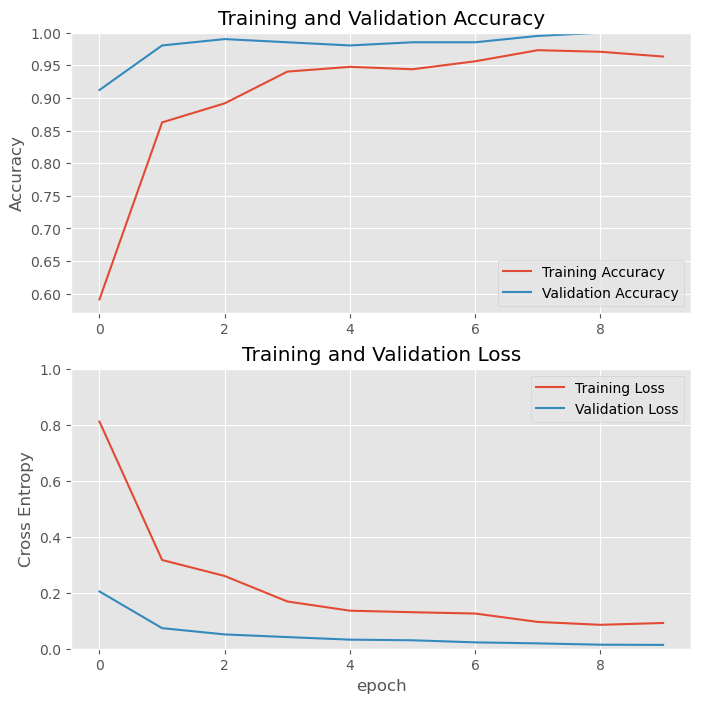

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

% Comenta los resultados que has obtenido


En las gráficas obtenidas, observamos la evolución del accuracy y loss tanto para el conjunto de entrenamiento como para el de validación. En el modelo inicial, que solo actualiza la capa de clasificación, la precisión de validación alcanza rápidamente un valor cercano al 95%(muy alto...), mientras que la pérdida disminuye constantemente a lo largo de las épocas, indicando un buen ajuste del modelo a los datos.


### 2.4 Fine tune [1 punto]

En el ejercicio 2.3 de extracción de características, sólo hemos entrenado la última capa Dense sobre un modelo base ResNet50. Los pesos de la red preentrenada no se han actualizado durante el entrenamiento. En este ejercicio, reentrenaremos nuestro modelo pero actualizando todos los pesos en el momento del entrenamiento. Crea las celdas de código que creas necesarias para realizar la solución.

In [123]:
# Un-freeze the base model layers, añade pesos
base_model.trainable = True

In [129]:
prediction_layer = tf.keras.layers.Dense(1)

model = tf.keras.Sequential([
  data_augmentation_5,
  base_model,
  tf.keras.layers.Dropout(0.2),
  prediction_layer
])

#base_model.summary()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [135]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:
history_fine_tune = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)

loss, accuracy = model.evaluate(validation_ds)
print(f"Validation accuracy after fine tuning: {accuracy * 100:.2f}%")

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 815ms/step - accuracy: 0.8083 - loss: 0.4746 - val_accuracy: 0.5659 - val_loss: 229674.6875
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 761ms/step - accuracy: 0.8497 - loss: 0.3950 - val_accuracy: 0.4341 - val_loss: 39734.3516
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 754ms/step - accuracy: 0.9452 - loss: 0.1198 - val_accuracy: 0.4341 - val_loss: 2476.3169
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 749ms/step - accuracy: 0.9704 - loss: 0.0887 - val_accuracy: 0.4439 - val_loss: 129.2773
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 745ms/step - accuracy: 0.9756 - loss: 0.0848 - val_accuracy: 0.4488 - val_loss: 47.0914
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 751ms/step - accuracy: 0.9865 - loss: 0.0341 - val_accuracy: 0.4537 - val_loss: 17.4340
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 764ms/step - accuracy: 0.9868 - loss: 0.0370 - val_accuracy: 0.4390 - val_loss: 23.0953
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 766ms/step - accuracy: 0.9850 - loss: 

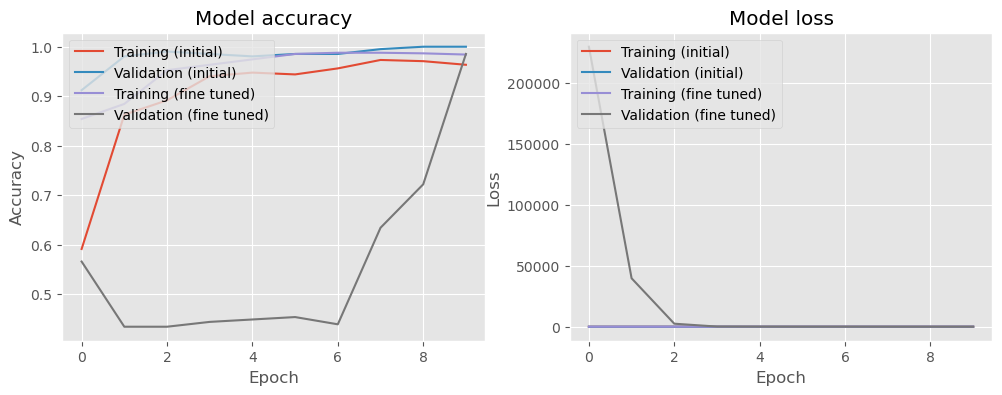

In [139]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training (initial)')
plt.plot(history.history['val_accuracy'], label='Validation (initial)')
plt.plot(history_fine_tune.history['accuracy'], label='Training (fine tuned)')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation (fine tuned)')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training (initial)')
plt.plot(history.history['val_loss'], label='Validation (initial)')
plt.plot(history_fine_tune.history['loss'], label='Training (fine tuned)')
plt.plot(history_fine_tune.history['val_loss'], label='Validation (fine tuned)')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

% pon aquí el análisis de los resultados


En este conjunto de gráficas (con fine tuning) se observa una mejora significativa. Después de descongelar la base convolucional y permitir que todos los pesos se actualicen durante el entrenamiento, la precisión de validación aumenta aún más, alcanzando casi el 100% al final del entrenamiento. La pérdida de validación también muestra una disminución notable, lo que sugiere que el modelo es capaz de generalizar mejor a los datos de validación.

Estos resultados destacan la efectividad del fine tuning en la mejora del rendimiento del modelo. Al actualizar todos los pesos, el modelo puede ajustar mejor las características extraídas de las capas convolucionales preentrenadas, resultando en una mayor precisión y una menor pérdida. En resumen, el fine tuning ha permitido que el modelo aproveche mejor la información contenida en los datos de entrenamiento, mejorando así su capacidad de generalización.

# Ejercicio 3: detección de objetos mediante regresión

Una red neuronal para localización de objetos tiene como entrada una imagen y como salida **cuatro valores numéricos** que definen el "bounding box": la coordenada x, la coordenada y, la anchura y la altura. Se trata por tanto de un problema de regresión.

## Código de base

En este ejercicio le daremos algunas funciones ya implementadas para introducir el problema que queremos resolver y que deberá utilizar/modificar para realizar los ejercicios.

Importamos los módulos de Python que necesitaremos:


In [141]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from skimage.transform import resize
import matplotlib.pyplot as plt

### Generador de datos para localización de objetos

Ante todo crearemos un dataset simple de localización de objetos. Partiremos del dataset de clasificación de imágenes [Fashion-MNIST](https://keras.io/api/datasets/fashion_mnist/).

[Fashion-MNIST](https://keras.io/api/datasets/fashion_mnist/) es un conjunto de datos similar al MNIST que ya conoce, pero está pensado para ser un poco más difícil. Consiste en un conjunto de entrenamiento de $60.000$ ejemplos y un conjunto de pruebas de $10.000$ ejemplos. Cada ejemplo es una imagen en escala de grises de $28 \times 28$ pixels, asociada a una etiqueta de $10$ clases posibles:


| Label | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Description | T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |
| | 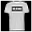 |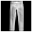 | 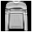 | 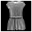 | 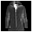 | 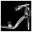 | 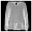 | 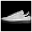 | 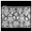 | 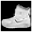 |



El siguiente código implementa nuestro dataset de base utilizando la interfaz [`Sequence`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence) de `keras`. Eche un vistazo a la documentación de la interfaz [`Sequence`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence), luego estudie bien el código de la siguiente clase (`FashionMNISTlocalizationDataset`) y asegúrese de que lo entiende.

In [144]:
class FashionMNISTlocalizationDataset(keras.utils.Sequence):
    """Fashion-MNIST localization toy dataset. Generates data for Keras."""

    def __init__(self, imgsize=(64,64), training=True, batch_size=32,
                 shuffle=True):
        """
        Args:
            imgsize (tuple (int,int), optional) - the size of generated images,
                both width and height, must be > 48x48.
            training (bool, optional) – If True, creates dataset from Fashion-MNIST
                training samples, otherwise from test.
            batch_size (int, optional) - the number of images in each generated
                batch.
            shuffle (bool, optional) - If True, the dataset is randomly shuffled
                at every epoch.
        """
        assert len(imgsize)==2 and imgsize[0] > 48 and imgsize[1] > 48
        self.imgsize = imgsize
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.training = training

        # load the Fashion-MNIST dataset (train or test split)
        if training:
          (self.data, self.labels), (_,_) = keras.datasets.fashion_mnist.load_data()
        else:
          (_,_), (self.data, self.labels) = keras.datasets.fashion_mnist.load_data()

        # Normalization
        self.data = self.data/255.

        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.data.shape[0] / self.batch_size))

    def __getitem__(self, idx):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]

        X = [] # batch of images
        y = [] # batch of target values

        # Generate data
        for index in indexes:
            # create a black image
            image = np.zeros(self.imgsize)
            image_width, image_height = self.imgsize
            # add some noise (to make the localization more dificult)
            image += np.random.random(self.imgsize)
            image = np.clip(image, 0., 1.)

            # Get one Fashion-MNIST object, resize it randomly, and copy it into
            # a random location of the black image
            object_img = self.data[index,:,:]
            object_width  = np.random.randint(12,48)
            object_height = np.random.randint(12,48)
            object_img = resize(object_img, (object_height, object_width))
            x_offset = np.random.randint(0,image_width-object_width)
            y_offset = np.random.randint(0,image_height-object_height)
            image[y_offset:y_offset+object_height, x_offset:x_offset+object_width] += object_img

            image = image.reshape(self.imgsize+(1,)) # must be a tensor image of size (width, height, channels)

            # normalize the target values (bounding box coordinates) so they are real numbers from 0. to 1.
            bbox = np.array([x_offset / image_width, y_offset / image_height,
                         object_width / image_width, object_height / image_height], dtype=np.float32)

            X.append(image)
            y.append(bbox)

        return np.array(X), np.array(y)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.data.shape[0])
        if (self.shuffle == True) and (self.training == True):
            np.random.shuffle(self.indexes)


Ahora podemos utilizar esta clase para generar datos de la siguiente forma:

In [365]:
imgsize = (64,64)
batch_size = 32

# Create the data generators
training_generator = FashionMNISTlocalizationDataset(imgsize=imgsize,batch_size=batch_size)
validation_generator = FashionMNISTlocalizationDataset(imgsize=imgsize,training=False,batch_size=batch_size)

# Check the len and batch data shapes
print(training_generator.__len__(), validation_generator.__len__())
X,y = training_generator.__getitem__(0)
print(X.shape, y.shape)

1875 312
(32, 64, 64, 1) (32, 4)


Fíjese que la interfaz `Sequence` nos permite generar "bacthes" de 32 imágenes ($X$, la entrada a nuestra red) con sus anotaciones correspondientes ($y$, la salida esperada de nuestra red).

Podremos acceder a los "batches" de entrenamiento/validación como si se tratara de cualquier `iterator` de Python. Por ejemplo podemos hacer:

`for X,y in training_generator`

e ir obteniendo 32 imágenes y 32 anotaciones en cada iteración hasta haber visto todos los ejemplos de nuestro conjunto de datos de entrenamiento ($1875 * 32 = 60.000$)

### Visualización de algunos ejemplos de nuestro dataset

La siguiente función nos permite visualizar imágenes de nuestro dataset con su correspondiente cuadrado delimitador (bounding box).

0 (64, 64, 1) [0.3125   0.546875 0.609375 0.265625]
1 (64, 64, 1) [0.       0.578125 0.703125 0.375   ]
2 (64, 64, 1) [0.0625   0.25     0.671875 0.625   ]
3 (64, 64, 1) [0.      0.0625  0.71875 0.59375]


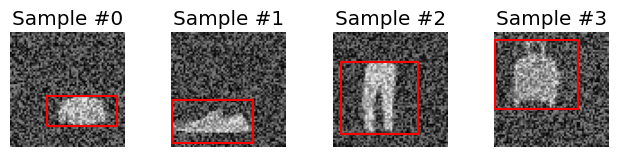

In [219]:
def show_bbox(image, bbox, pred=None):
    """Show image with bbox"""
    image = image.squeeze()
    plt.imshow(image, cmap='gray')

    # plot the ground truth bounding box
    imgsize = image.shape
    bbox *= [imgsize[0],imgsize[1],imgsize[0],imgsize[1]]
    plt.plot([bbox[0],bbox[0]+bbox[2],bbox[0]+bbox[2],bbox[0],bbox[0]],
             [bbox[1],bbox[1],bbox[1]+bbox[3],bbox[1]+bbox[3],bbox[1]], c='r')

    if pred is not None:
        # plot the predicted bounding box (if provided)
        pred *= [imgsize[0],imgsize[1],imgsize[0],imgsize[1]]
        plt.plot([pred[0],pred[0]+pred[2],pred[0]+pred[2],pred[0],pred[0]],
                 [pred[1],pred[1],pred[1]+pred[3],pred[1]+pred[3],pred[1]], c='b')


X,y = training_generator.__getitem__(0)
fig = plt.figure()
for i in range(4):
    sample = {}
    sample['image'] = X[i,...]
    sample['bbox']  = y[i,...]
    print(i, sample['image'].shape, sample['bbox'])
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(**sample)

plt.show()


### 3.1 Crear y entrenar la red neuronal convolucional (CNN) de regresión [1 punto]


En este ejercicio deberá crear una red neuronal convolucional (CNN) para localizar objetos en una imagen. Modelaremos la localización de objetos como un problema de regresión: dada una imagen de entrada nuestra CNN deberá predecir cuatro números reales (coordenada x, coordenada y, anchura y altura del bounding box).

Puede utilizar un modelo CNN sencillo similar al ejemplo del notebook [01_CNN_MNIST.ipynb](https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/blob/master/5_neural_networks_examples/01_CNN_MNIST.ipynb) de clasificación imágenes que tiene en el repositorio de la asignatura. Por ejemplo: dos capas convolucionales (una con $32$ kernels de $3 \times 3$ y la otra con $64$ kernels de $3 \times 3$) y una capa completamente conectada (`Dense` o "fully connected" en inglés) .

Fíjese que la capa de salida debe tener cuatro neuronas (x, y, anchura y altura) con una función de activación adecuada para la tarea de regresión. O sea, a diferencia del ejemplo de clasificación de imágenes aquí **no utilizaremos `softmax` en la última capa**. Puesto que los valores de los "bounding boxes" que queremos predecir están normalizados en el rango $(0,1)$ debemos utilizar una función de activación con un rango de salida también entre $(0,1)$.

### 3.1.1 Crear el modelo

In [249]:
# añadid aquí el código para crear el modelo

input_shape = (64, 64, 1)
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='sigmoid'))  # 4 valores para el bbox: x, y, ancho, alto


### 3.1.2 Compilar el modelo

Añada el código necesario para compilar el modelo que ha creado. Fíjese que debe indicar la función de coste (`loss`) adecuada para un problema de regresión. En [este enlace](https://keras.io/api/losses/) puede consultar la documentación de las funciones de coste de `Keras`.

In [255]:
# añadid aquí el código para compilar el modelo
model.compile(optimizer='adam', loss='mse')  # 'mean_squared_error'
#como se predicen valores nuericos continuos no se puede usar categorical_crossentropy !!!!! 
# por eso daba perdidas enormes en el fit...

### 3.1.3 Entrenamiento del modelo

Ejecute la siguiente celda para entrenar su modelo durante 6 épocas con el generador de datos que hemos creado antes.

In [254]:
mfit  = model.fit(training_generator, validation_data=validation_generator, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.0143 - val_loss: 0.0067
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0039 - val_loss: 0.0038


### 3.1.4 Visualizar las curvas de la función de coste durante el proceso de entrenamiento

Muestre las curvas de la función de coste en los conjuntos de datos de entrenamiento y validación durante el entrenamiento del modelo.

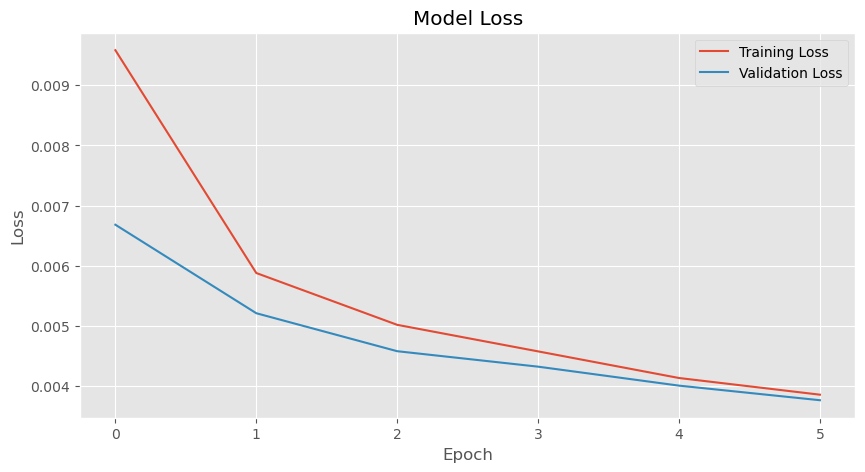

In [258]:
# añadid aquí el código
plt.figure(figsize=(10, 5))
plt.plot(mfit.history['loss'], label='Training Loss')
plt.plot(mfit.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
0 (64, 64, 1) (4,) (4,)
1 (64, 64, 1) (4,) (4,)
2 (64, 64, 1) (4,) (4,)
3 (64, 64, 1) (4,) (4,)


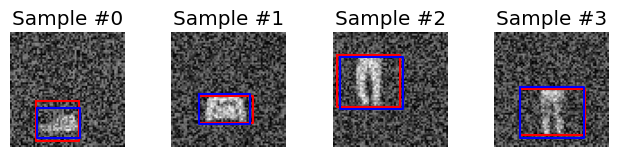

In [260]:
X_val, y_val = validation_generator.__getitem__(0)
y_pred = model.predict(X_val)

# Visualización de algunos ejemplos y sus predicciones correspondientes
fig = plt.figure()
for i in range(4):
    sample = {}
    sample['image'] = X_val[i,...]
    sample['bbox'] = y_val[i,...]
    sample['pred'] = y_pred[i,...]
    print(i, sample['image'].shape, sample['bbox'].shape, sample['pred'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(sample['image'], sample['bbox'], sample['pred'])

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


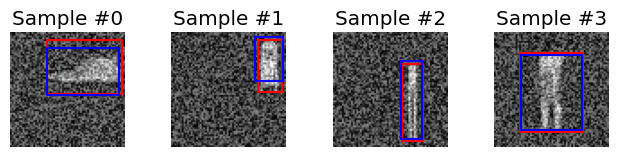

In [262]:
X_val, y_val = validation_generator.__getitem__(0)
y_pred = model.predict(X_val)

# Visualización de algunos ejemplos y sus predicciones correspondientes
fig = plt.figure()
for i in range(4):
    sample = {}
    sample['image'] = X_val[i,...]
    sample['bbox'] = y_val[i,...]
    sample['pred'] = y_pred[i,...]
    #print(i, sample['image'].shape, sample['bbox'].shape, sample['pred'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(sample['image'], sample['bbox'], sample['pred'])

plt.show()

In [264]:
y_pred # comprobación 1º error x mala función de perdida del modelo

array([[2.0009363e+01, 8.3386602e+00, 4.0456642e+01, 2.5947090e+01],
       [4.6172310e+01, 1.9579383e+00, 1.5407846e+01, 2.4610323e+01],
       [3.7482487e+01, 1.5656807e+01, 1.1601998e+01, 4.3462566e+01],
       [1.4261842e+01, 1.1973766e+01, 3.3965832e+01, 4.2188091e+01],
       [3.5179237e-01, 8.9932211e-02, 3.5617670e-01, 3.7887526e-01],
       [1.6970167e-01, 6.3549042e-01, 5.8998597e-01, 3.2058400e-01],
       [3.5177055e-01, 2.6817992e-01, 5.2186394e-01, 4.3920070e-01],
       [6.4706162e-02, 5.0061729e-02, 6.4876544e-01, 2.1775450e-01],
       [2.6160771e-02, 3.6936328e-01, 2.2892287e-01, 3.2908541e-01],
       [3.1993061e-01, 3.5126710e-01, 3.0710223e-01, 4.9045959e-01],
       [3.0736738e-01, 4.4038537e-01, 5.8134246e-01, 4.6157625e-01],
       [3.1028610e-01, 1.5723959e-01, 5.0411588e-01, 3.0864650e-01],
       [6.1509136e-02, 2.2131860e-01, 7.1716797e-01, 3.6813411e-01],
       [3.9485729e-01, 2.7900341e-01, 2.5476229e-01, 6.6398132e-01],
       [2.2140402e-01, 2.2839031e-

### 3.2 Crear y entrenar la red neuronal convolucional (CNN) de regresión [1.5 puntos]

Una vez hemos entrenado la red podemos utilizarla para realizar predicciones en las imágenes del conjunto de validación. El siguiente código nos servirá para realizar predicciones a cuatro imágenes y visualizarlas para ver si son correctas.

In [313]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_imagen(image_path, target_size=(64, 64)):
    img = load_img(image_path, color_mode='grayscale', target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
    return img_array

# Cargar las nuevas imágenes
new_imagenes_paths = [
    'imagenes/imagen1.png',
    'imagenes/imagen2.png',
    'imagenes/imagen3.png',
    'imagenes/imagen4.png'
]
new_imagenes = [load_and_preprocess_imagen(imagenes_path) for imagenes_path in new_imagenes_paths]
new_imagenes = np.vstack(new_imagenes)  # Combinar en un solo array


In [315]:
new_preds = model.predict(new_imagenes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [337]:
bbox_temp = np.array([
    [0.22382276, 0.2096421, 0.7067996, 0.7465708],
    [0.06712503, 0.12043147, 0.765247, 0.76629704],
    [0.17117643, 0.16275896, 0.6499562, 0.69826984],
    [0.15069228, 0.21554957, 0.6574658, 0.66370416]
])

[0.12382276 0.1096421  0.7067996  0.7465708 ]
[0.06712503 0.11043147 0.765247   0.76629704]
[0.17117643 0.10275896 0.6499562  0.69826984]
[0.15069228 0.21554957 0.6574658  0.66370416]


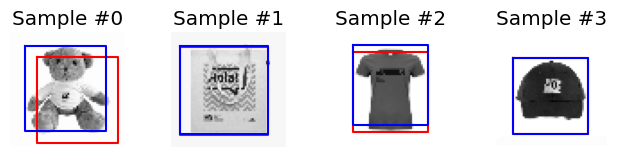

In [339]:
def show_bbox(image, bbox, pred=None):
    """Show image with bbox"""
    image = image.squeeze()
    plt.imshow(image, cmap='gray')

    # plot the ground truth bounding box (aquí no hay bbox real, así que se omite)
    imgsize = image.shape
    bbox = np.array(bbox) * np.array([imgsize[0], imgsize[1], imgsize[0], imgsize[1]])
    plt.plot([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]],
             [bbox[1], bbox[1], bbox[1] + bbox[3], bbox[1] + bbox[3], bbox[1]], c='r')

    if pred is not None:
        # plot the predicted bounding box (if provided)
        pred = np.array(pred) * np.array([imgsize[0], imgsize[1], imgsize[0], imgsize[1]])
        plt.plot([pred[0], pred[0] + pred[2], pred[0] + pred[2], pred[0], pred[0]],
                 [pred[1], pred[1], pred[1] + pred[3], pred[1] + pred[3], pred[1]], c='b')

# Mostrar las nuevas imágenes con los bounding boxes predichos
fig = plt.figure()
for i in range(len(new_images)):
    sample = {'image': new_images[i, ...], 'bbox': bbox_temp[i, :]}  # Convertir bbox_temp a un array de NumPy
    ax = plt.subplot(1, len(new_images), i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(sample['image'], sample['bbox'], new_preds[i])
    print(new_preds[i])

plt.show()

Si el modelo que ha creado es correcto y lo ha entrenado correctamente los cuadros delimitadores de las predicciones (en color azul) deberían ser buenas aproximaciones de los objetivos (en rojo). Con un modelo sencillo de dos capas convolucionales al menos algunas de las predicciones deberían ser correctas.

Si además de visualizar los resultados queremos medir (cuantificar) si los resultados son correctos o no en todo el conjunto de validación deberemos implementar una medida de rendimiento adecuada para la tarea de localización.

Dados dos cuadros delimitadores (bounding boxes), uno con la predicción de nuestro modelo y uno con la anotación del dataset (en inglés ground-truth), utilizaremos la medida de intersección sobre unión (IoU por sus siglas en inglés de Intersection over Union) para decidir si la predicción es correcta o no.

<table>
<tr>
<td><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg" width=50%></td>
<td><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width=50%></td>
</tr>
<tr>
<td colspan=2><div style="font-size:3">Fuente de la imagen: https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for- object-detection/</div></td>
</tr>
</table>

La medida IoU será un valor entre $0$ y $1$, mayor cuanto más se parezcan los dos cuadros. La siguiente función calcula la medida IoU entre dos cuadros delimitadores y devuelve `True` (predicción correcta) o `False` (predicción incorrecta) en función de si es mayor o igual que un umbral (en inglés threshold) predeterminado.

In [341]:
def IoU(pred, target, iou_threshold = 0.7):
    # determine the coordinates of the intersection rectangle
    x_left = np.maximum(pred[:,0], target[:,0])
    y_top = np.maximum(pred[:,1], target[:,1])
    x_right = np.minimum(pred[:,0]+pred[:,2], target[:,0]+target[:,2])
    y_bottom = np.minimum(pred[:,1]+pred[:,3], target[:,1]+target[:,3])

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the areas of the union
    pred_area = pred[:,2] * pred[:,3]
    target_area =  target[:,2] *  target[:,3]

    union_area = pred_area + target_area - intersection_area

    iou = intersection_area / union_area

    return iou>iou_threshold

Hagamos alguna prueba para comprobar que funciona correctamente. Definimos tres bounding boxes ($a$, $b$, y $c$) arbitrarias y comprobamos si se cumple la condición $IoU > 0.7$. Recuerde que una "bounding box" está definida por cuatro números reales entre $0$ y $1$: coordenada x, coordenada y, anchura, y altura.

In [182]:
a = np.array([[0,0,1,1]])
b = np.array([[0,1,0.5,0.5]])
c = np.array([[0.1,0.1,0.85,0.85]])

print(IoU(a, a), IoU(a,b), IoU(a,c))

[ True] [False] [ True]


Fíjese que los parámetros de la función `IoU` deben ser `np.array` de dos dimensiones. De esta forma podemos evaluar si se cumple la condición $IoU > 0.7$ en todo un "batch" de predicciones:

In [191]:
a = np.random.random((32,4))
b = np.random.random((32,4))

IoU(a,b)

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

### Defina la función de test

Utilizando la función `IoU` ahora puede calcular la precisión (Accuracy) de su modelo: el número de imágenes en las que la predicción es correcto dividido por el número total de imágenes en el conjunto de datos de validación.

Escriba una función que evalúe su modelo en todo el conjunto de datos de validación y devuelva la precisión del modelo (Accuracy).

In [418]:
len(validation_generator)

312

In [471]:
def test(model, data_generator, iou_threshold=0.7):
    correct_predictions = 0
    total_predictions = 0
    empty_batch_count = 0  # Contador de lotes vacíos
    max_empty_batches = 10  # Máximo número de lotes vacíos permitidos antes de salir del bucle
    
    for X, y_true in data_generator:
        if len(X) == 0 or len(X) < data_generator.batch_size:
            empty_batch_count += 1
            if empty_batch_count > max_empty_batches:
                print("Too many empty batches, stopping the test.")
                break  # Salir del bucle si hay demasiados lotes vacíos
            continue

        empty_batch_count = 0  
        y_pred = model.predict(X, verbose=0) # verbose quita los mensjes repetidos
        total_predictions += len(y_true)
        correct_predictions += np.sum(IoU(y_pred, y_true, iou_threshold))

    print("Total images:", total_predictions,"correctas",correct_predictions)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [473]:
# call the test method
acc = test(model, validation_generator,0.7)
print('\nTest set: Accuracy: {:.0f}%\n'.format(acc*100))

Too many empty batches, stopping the test.
Total images: 9984 correctas 6643

Test set: Accuracy: 67%



Con un modelo sencillo como el creado la precisión debería ser de un $35\%$ aproximadamente.

### 3.3 Analiza los resultados obtenidos y explica cómo podrías mejorar el modelo [1 punto]

- a) ¿Qué análisis haces de la arquitectura de red del ejercicio 3? ¿Qué estrategias han sido más exitosas y por qué?
- b) En los ejercicios anteriores no se ha tenido en cuenta la complejidad de la red ni el tiempo de entrenamiento. Relaciona la precisión obtenida con estos factores. ¿Qué esperarías si utilizáramos las arquitecturas propuestas en datasets más complejos?
- c) En este problema hemos trabajado el problema de regresión, pero en una aplicación real podría ser necesario que un mismo modelo realizara al mismo tiempo la localización y clasificación del objeto. Explica brevemente cómo debería modificarse la arquitectura del modelo y la función de coste para llevar a cabo ambas tareas al mismo tiempo.

% añade aquí tus respuestas

a) La arquitectura utilizada en el ejercicio 3 es una **CNN** sencilla con dos capas convolucionales y una capa densa. Esta simplicidad permite entrenar rápidamente el modelo y obtener resultados razonables en tareas de localización de objetos. La utilización de capas convolucionales y de pooling reduce la dimensionalidad de las imágenes, extrayendo características esenciales y mejorando la eficiencia computacional. Sin embargo, esta arquitectura puede ser insuficiente para capturar complejidades en datasets más grandes o con mayor variabilidad. Las estrategias más exitosas incluyen el uso de funciones de activación ReLU que aceleran la convergencia y la normalización de los datos, lo que mejora la precisión y estabilidad del entrenamiento. Gracias a ser un modelo sencillo se ha podido ejecutar sin *GPU* y en un tiempo más que aceptable.

b) La arquitectura sencilla utilizada en estos ejercicios tiene una precisión en mi caso del 67%, lo cual es adecuado para un modelo básico y el dataset Fashion-MNIST. Este resultado refleja un equilibrio entre la simplicidad del modelo y su capacidad para generalizar(lo cual implica efectividad). Sin embargo, en datasets más complejos, se esperaría que esta arquitectura tuviera dificultades para capturar todas las características relevantes, resultando en una menor precisión. Para mejorar el rendimiento en datasets más complejos, sería necesario aumentar la profundidad de la red, incluir más capas convolucionales, y posiblemente integrar técnicas avanzadas como regularización, dropout y arquitecturas más complejas como ResNet o Inception, a cambio de un mayor tiempo de entrenamiento y mayor demanda computacional, es decir delimita su uso.

c) Para que el modelo realice 2 tareas sobre objetos simultáneamente, se necesita modificar la arquitectura para tener dos salidas: una para la localización (regresión) y otra para la clasificación (etiquetado del objeto). Esto se puede hacer agregando dos "cabezas" al final de la red compartida. La red compartida incluiría varias capas convolucionales para extraer características importantes de las imágenes. Luego, se añadirían dos ramas separadas: una terminaría en una capa densa con cuatro neuronas y activación sigmoid para predecir las coordenadas del cuadro delimitador (bounding box), y la otra terminaría en una capa densa con softmax para la clasificación del objeto.

La función de coste también debe ajustarse. Necesitaríamos combinar la pérdida de regresión (por ejemplo, MSE, que mide la diferencia entre las coordenadas predichas y las reales) con la pérdida de clasificación (por ejemplo, categorical crossentropy, que mide la diferencia entre la clase predicha y la clase real). Estas dos pérdidas se combinan para entrenar el modelo de manera que aprenda a realizar ambas tareas al mismo tiempo.

En la documentación existen ejemplos de como se implementan estas técnicas:  [TensorFlow: Functional API for Multiple Outputs](https://www.tensorflow.org/guide/keras/functional#multi-input_and_multi-output_models).

## **Rúbrica**

La nota de los distintos ejercicios es la siguiente:

- Ejercicio 1: 35%. Para obtener la máxima puntuación debes conseguir que tu modelo compile y entrene sin errores, y visualizar las curvas de la función de coste correctamente. Es necesario Razonar las respuestas.
- Ejercicio 2: 30%. Para obtener la máxima puntuación debes implementar los métodos de transfer learning y responder a las preguntas correctamente justificando tus respuestas.
- Ejercicio 3: 35%. Para obtener la máxima puntuación debes implementar la red de regresión, realizar detecciones correctas y responder a las preguntas correctamente justificando tus respuestas.

## **Fuentes y recursos de interés:**
- https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
- https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
- https://keras.io/api/losses/
